This is what I try to do because everything before was barely better than random guess

In [1]:
import pandas as pd 
import numpy as np 

from sklearn.metrics import mean_squared_error, log_loss
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('max_columns', 300)

In [2]:
df_test = pd.read_csv('processed_data/men/testing_playoff.csv')
df_test.head()

,Season,DayNum,Team1,Team2,target,target_points,T1_Loc,T2_Loc,ID,T1_Score,T1_FGM,T1_FGA,T1_FGM3,T1_FGA3,T1_FTM,T1_FTA,T1_OR,T1_DR,T1_Ast,T1_TO,T1_Stl,T1_Blk,T1_PF,T1_FGM2,T1_FGA2,T1_Tot_Reb,T1_FGM_no_ast,T1_possessions,T1_off_rating,T1_scoring_opp,T1_TO_perposs,T1_def_rating,T1_impact,T1_Def_effort,T1_Reb_opp,T1_Score_diff,T1_FGM_diff,T1_FGA_diff,T1_FGM3_diff,T1_FGA3_diff,T1_FTM_diff,T1_FTA_diff,T1_OR_diff,T1_DR_diff,T1_Ast_diff,T1_TO_diff,T1_Stl_diff,T1_Blk_diff,T1_PF_diff,T1_FGM2_diff,T1_FGA2_diff,T1_Tot_Reb_diff,T1_FGM_no_ast_diff,T1_Def_effort_diff,T1_Reb_opp_diff,T1_possessions_diff,T1_off_rating_diff,T1_def_rating_diff,T1_scoring_opp_diff,T1_TO_perposs_diff,T1_impact_diff,T1_N_wins,T1_FGM_perc,T1_FGM2_perc,T1_FGM3_perc,T1_FT_perc,T1_FGM_no_ast_perc,T2_Score,T2_FGM,T2_FGA,T2_FGM3,T2_FGA3,T2_FTM,T2_FTA,T2_OR,T2_DR,T2_Ast,T2_TO,T2_Stl,T2_Blk,T2_PF,T2_FGM2,T2_FGA2,T2_Tot_Reb,T2_FGM_no_ast,T2_possessions,T2_off_rating,T2_scoring_opp,T2_TO_perposs,T2_def_rating,T2_impact,T2_Def_effort,T2_Reb_opp,T2_Score_diff,T2_FGM_diff,T2_FGA_diff,T2_FGM3_diff,T2_FGA3_diff,T2_FTM_diff,T2_FTA_diff,T2_OR_diff,T2_DR_diff,T2_Ast_diff,T2_TO_diff,T2_Stl_diff,T2_Blk_diff,T2_PF_diff,T2_FGM2_diff,T2_FGA2_diff,T2_Tot_Reb_diff,T2_FGM_no_ast_diff,T2_Def_effort_diff,T2_Reb_opp_diff,T2_possessions_diff,T2_off_rating_diff,T2_def_rating_diff,T2_scoring_opp_diff,T2_TO_perposs_diff,T2_impact_diff,T2_N_wins,T2_FGM_perc,T2_FGM2_perc,T2_FGM3_perc,T2_FT_perc,T2_FGM_no_ast_perc,stage_16,stage_32,stage_4,stage_64,stage_8,stage_Final,T1_rank,T2_rank,T1_seed,T2_seed,delta_Loc,delta_Score,delta_FGM,delta_FGA,delta_FGM3,delta_FGA3,delta_FTM,delta_FTA,delta_OR,delta_DR,delta_Ast,delta_TO,delta_Stl,delta_Blk,delta_PF,delta_FGM2,delta_FGA2,delta_Tot_Reb,delta_FGM_no_ast,delta_possessions,delta_off_rating,delta_scoring_opp,delta_TO_perposs,delta_def_rating,delta_impact,delta_Def_effort,delta_Reb_opp,delta_Score_diff,delta_FGM_diff,delta_FGA_diff,delta_FGM3_diff,delta_FGA3_diff,delta_FTM_diff,delta_FTA_diff,delta_OR_diff,delta_DR_diff,delta_Ast_diff,delta_TO_diff,delta_Stl_diff,delta_Blk_diff,delta_PF_diff,delta_FGM2_diff,delta_FGA2_diff,delta_Tot_Reb_diff,delta_FGM_no_ast_diff,delta_Def_effort_diff,delta_Reb_opp_diff,delta_possessions_diff,delta_off_rating_diff,delta_def_rating_diff,delta_scoring_opp_diff,delta_TO_perposs_diff,delta_impact_diff,delta_N_wins,delta_FGM_perc,delta_FGM2_perc,delta_FGM3_perc,delta_FT_perc,delta_FGM_no_ast_perc,delta_rank,delta_seed
0,2003,134,1411,1421,0,-8,0,0,2003_1411_1421,72.800000,24.733333,55.266667,5.933333,18.500000,17.400000,28.066667,13.166667,24.800000,14.200000,15.233333,6.433333,2.233333,18.300000,18.800000,36.766667,37.966667,10.533333,44.001667,173.193342,1.634307,0.361196,134.807976,0.532616,89.351498,0.724640,1.966667,-0.933333,-5.133333,-1.600000,-4.666667,5.433333,9.333333,1.233333,1.933333,0.433333,0.900000,-1.566667,-0.366667,-3.333333,0.666667,-0.466667,3.166667,-1.366667,-1.606612,-0.033819,-9.900000,38.385366,-38.385366,0.321635,0.091486,0.065232,0.600000,0.447527,0.511333,0.320721,0.619952,0.425876,71.206897,24.379310,56.793103,6.482759,18.000000,15.965517,20.931034,12.275862,23.172414,13.034483,16.206897,7.068966,3.000000,19.103448,17.896552,38.793103,35.448276,11.344828,50.781897,146.966608,1.366193,0.318689,163.179577,0.466801,84.903762,0.697730,-7.241379,-3.413793,-4.172414,-1.137931,-2.758621,0.724138,-1.620690,-1.448276,0.344828,-2.827586,3.379310,-1.758621,-1.241379,0.413793,-2.275862,-1.413793,-1.103448,-0.586207,4.445492,-0.012650,1.425000,-16.212970,16.212970,-0.132237,0.054515,-0.066398,0.448276,0.429265,0.461333,0.360153,0.762768,0.465347,0,0,0,0,0,0,239.281250,240.343750,16,16,0,1.593103,0.354023,-1.526437,-0.549425,0.500000,1.434483,7.135632,0.890805,1.627586,1.165517,-0.973563,-0.635632,-0.766667,-0.803448,0.903448,-2.026437,2.518391,-0.811494,-6.780230,26.226735,0.268114,0.042507,-28.371601,0.065815,4.447735,0.026911,9.208046,2.480460,-0.960920,-0.462069,-1.908046,4.709195,10.954023,2.681609,1.588506,3.2

In [3]:
stats = [col[3:] for col in df_test.columns if 'T1_' in col and 'Loc' not in col]
stats

['Score',
 'FGM',
 'FGA',
 'FGM3',
 'FGA3',
 'FTM',
 'FTA',
 'OR',
 'DR',
 'Ast',
 'TO',
 'Stl',
 'Blk',
 'PF',
 'FGM2',
 'FGA2',
 'Tot_Reb',
 'FGM_no_ast',
 'possessions',
 'off_rating',
 'scoring_opp',
 'TO_perposs',
 'def_rating',
 'impact',
 'Def_effort',
 'Reb_opp',
 'Score_diff',
 'FGM_diff',
 'FGA_diff',
 'FGM3_diff',
 'FGA3_diff',
 'FTM_diff',
 'FTA_diff',
 'OR_diff',
 'DR_diff',
 'Ast_diff',
 'TO_diff',
 'Stl_diff',
 'Blk_diff',
 'PF_diff',
 'FGM2_diff',
 'FGA2_diff',
 'Tot_Reb_diff',
 'FGM_no_ast_diff',
 'Def_effort_diff',
 'Reb_opp_diff',
 'possessions_diff',
 'off_rating_diff',
 'def_rating_diff',
 'scoring_opp_diff',
 'TO_perposs_diff',
 'impact_diff',
 'N_wins',
 'FGM_perc',
 'FGM2_perc',
 'FGM3_perc',
 'FT_perc',
 'FGM_no_ast_perc',
 'rank',
 'seed']

In [5]:
def test_by_year(df_test):
    coefs = {}

    for year in range(2014, 2019):
        print(year)
        
        train = df_test[df_test.Season < year].copy()
        test = df_test[df_test.Season == year].copy()

        target = train['target']
        validation = test['target']

        to_drop = ['target','target_points','Team1','Team2', 'ID', 'DayNum', 'Pred', 'Season']
        to_drop += [col for col in train.columns if 'Loc' in col]

        for col in to_drop:
            try:
                del train[col]
                del test[col]
            except KeyError:
                pass

        kfolds = KFold(5, shuffle=True, random_state=984)

        scl = ('scl', RobustScaler())

        pipe = Pipeline([scl, ('logit', LogisticRegression(solver='lbfgs', max_iter=5000))])

        comm_cols = list(set(train.columns).intersection(test.columns))

        oof = np.zeros(len(train))
        predictions = np.zeros(len(test))
        feature_importance_df = pd.DataFrame()

        for fold_, (trn_idx, val_idx) in enumerate(kfolds.split(train.values, target.values)):
            print("fold n°{}".format(fold_))

            trn_data = train.iloc[trn_idx][comm_cols]
            trn_target = target.iloc[trn_idx]

            val_data = train.iloc[val_idx][comm_cols]
            val_target = target.iloc[val_idx]
            
            grid_param = {'logit__C': np.arange(0.01, 1, 0.01)}#, 
                          #'logit__tol': [0.0001, 0.00001, 0.001, 0.000001, 0.01]}
            grid = GridSearchCV(pipe, param_grid=grid_param, n_jobs=-1, 
                                cv=5, scoring='neg_log_loss')
            grid.fit(trn_data, trn_target)
            best_pipe = grid.best_estimator_
            print(grid.best_params_)
            print(round( (-grid.best_score_ ) ,3))
            
            #best_pipe = Pipeline([scl, ('logit', LogisticRegression(solver='lbfgs', max_iter=5000, C=0.01))])

            model = best_pipe.fit(trn_data, trn_target)

            oof[val_idx] = model.predict_proba(val_data)[:,1]

            predictions += model.predict_proba(test[comm_cols])[:,1] / kfolds.n_splits

            fold_importance_df = pd.DataFrame()
            fold_importance_df["feature"] = comm_cols
            fold_importance_df["coefficient"] = model.steps[-1][1].coef_[0]
            fold_importance_df["fold"] = fold_ + 1
            feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

        coefs[year] = feature_importance_df
        
        print(f'\t {log_loss(target, oof)}')
        print(f'\t {log_loss(validation, predictions)}')
        
    fig, ax = plt.subplots(5, 1, figsize=(12, 50))

    i = 0

    for year in coefs.keys():
        cols = (coefs[year][["feature", "coefficient"]]
                .groupby("feature")
                .mean().abs()
                .sort_values(by="coefficient", ascending=False)[:50].index)

        best_features = coefs[year].loc[coefs[year].feature.isin(cols)]

        sns.barplot(x="coefficient",
                    y="feature",
                    data=best_features.sort_values(by="coefficient",
                                                   ascending=False), ax=ax[i])
        i += 1
    
    
def plot_coefs_by_year(coefs):
    fig, ax = plt.subplots(5, 1, figsize=(12, 50))

    i = 0

    for year in coefs.keys():
        cols = (coefs[year][["feature", "coefficient"]]
                .groupby("feature")
                .mean().abs()
                .sort_values(by="coefficient", ascending=False)[:50].index)

        best_features = coefs[year].loc[coefs[year].feature.isin(cols)]

        sns.barplot(x="coefficient",
                    y="feature",
                    data=best_features.sort_values(by="coefficient",
                                                   ascending=False), ax=ax[i])
        i += 1
        
        
def test_all_year(df_test):
    train = df_test.copy()

    target = train['target']

    to_drop = ['target','target_points','Team1','Team2', 'ID', 'DayNum', 'Pred', 'Season']
    to_drop += [col for col in train.columns if 'Loc' in col]

    for col in to_drop:
        try:
            del train[col]
        except KeyError:
            pass
    
    kfolds = KFold(5, shuffle=True, random_state=984)

    scl = ('scl', RobustScaler())
    pipe = Pipeline([scl, ('logit', LogisticRegression(solver='lbfgs', max_iter=5000))])

    comm_cols = list(set(train.columns))

    oof = np.zeros(len(train))
    feature_importance_df = pd.DataFrame()

    for fold_, (trn_idx, val_idx) in enumerate(kfolds.split(train.values, target.values)):
        print("fold n°{}".format(fold_))

        trn_data = train.iloc[trn_idx][comm_cols]
        trn_target = target.iloc[trn_idx]

        val_data = train.iloc[val_idx][comm_cols]
        val_target = target.iloc[val_idx]
        
        grid_param = {'logit__C': np.arange(0.01, 1, 0.01)}, 
                          #'logit__tol': [0.0001, 0.00001, 0.001, 0.000001, 0.01]}
        grid = GridSearchCV(pipe, param_grid=grid_param, n_jobs=-1, 
                            cv=5, scoring='neg_log_loss')
        grid.fit(trn_data, trn_target)
        best_pipe = grid.best_estimator_
        print(grid.best_params_)
        print(round( (-grid.best_score_ ) ,3))
        
        #best_pipe = Pipeline([scl, ('logit', LogisticRegression(solver='lbfgs', max_iter=5000, C=0.01))])

        model = best_pipe.fit(trn_data, trn_target)

        oof[val_idx] = model.predict_proba(val_data)[:,1]

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = comm_cols
        fold_importance_df["coefficient"] = model.steps[-1][1].coef_[0]
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    print(f'\t {log_loss(target, oof)}')

    cols = (feature_importance_df[["feature", "coefficient"]]
            .groupby("feature")
            .mean().abs()
            .sort_values(by="coefficient", ascending=False)[:100].index)

    best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

    plt.figure(figsize=(14,15))
    sns.barplot(x="coefficient",
                y="feature",
                data=best_features.sort_values(by="coefficient",
                                               ascending=False))
    plt.tight_layout()
    
    return oof
    

def make_sub(df_test, oof, name):
    df_test['Pred'] = oof

    sub = pd.read_csv('raw_data/mens-machine-learning-competition-2019/SampleSubmissionStage1.csv')

    del sub['Pred']

    sub = pd.merge(sub, df_test[['ID', 'Pred']], on='ID', how='left').fillna(0.5)

    sub.to_csv('model_results/men/'+ name + '.csv', index=False)

2014
fold n°0
fold n°1
fold n°2
fold n°3
fold n°4
	 0.5476473133715998
	 0.5675139741142687
2015
fold n°0
fold n°1
fold n°2
fold n°3
fold n°4
	 0.5500100747901382
	 0.5195818300429959
2016
fold n°0
fold n°1
fold n°2
fold n°3
fold n°4
	 0.5437512235971177
	 0.5618178210120909
2017
fold n°0
fold n°1
fold n°2
fold n°3
fold n°4
	 0.5475641161436747
	 0.5310189563187958
2018
fold n°0
fold n°1
fold n°2
fold n°3
fold n°4
	 0.54559138751656
	 0.5959194038383684


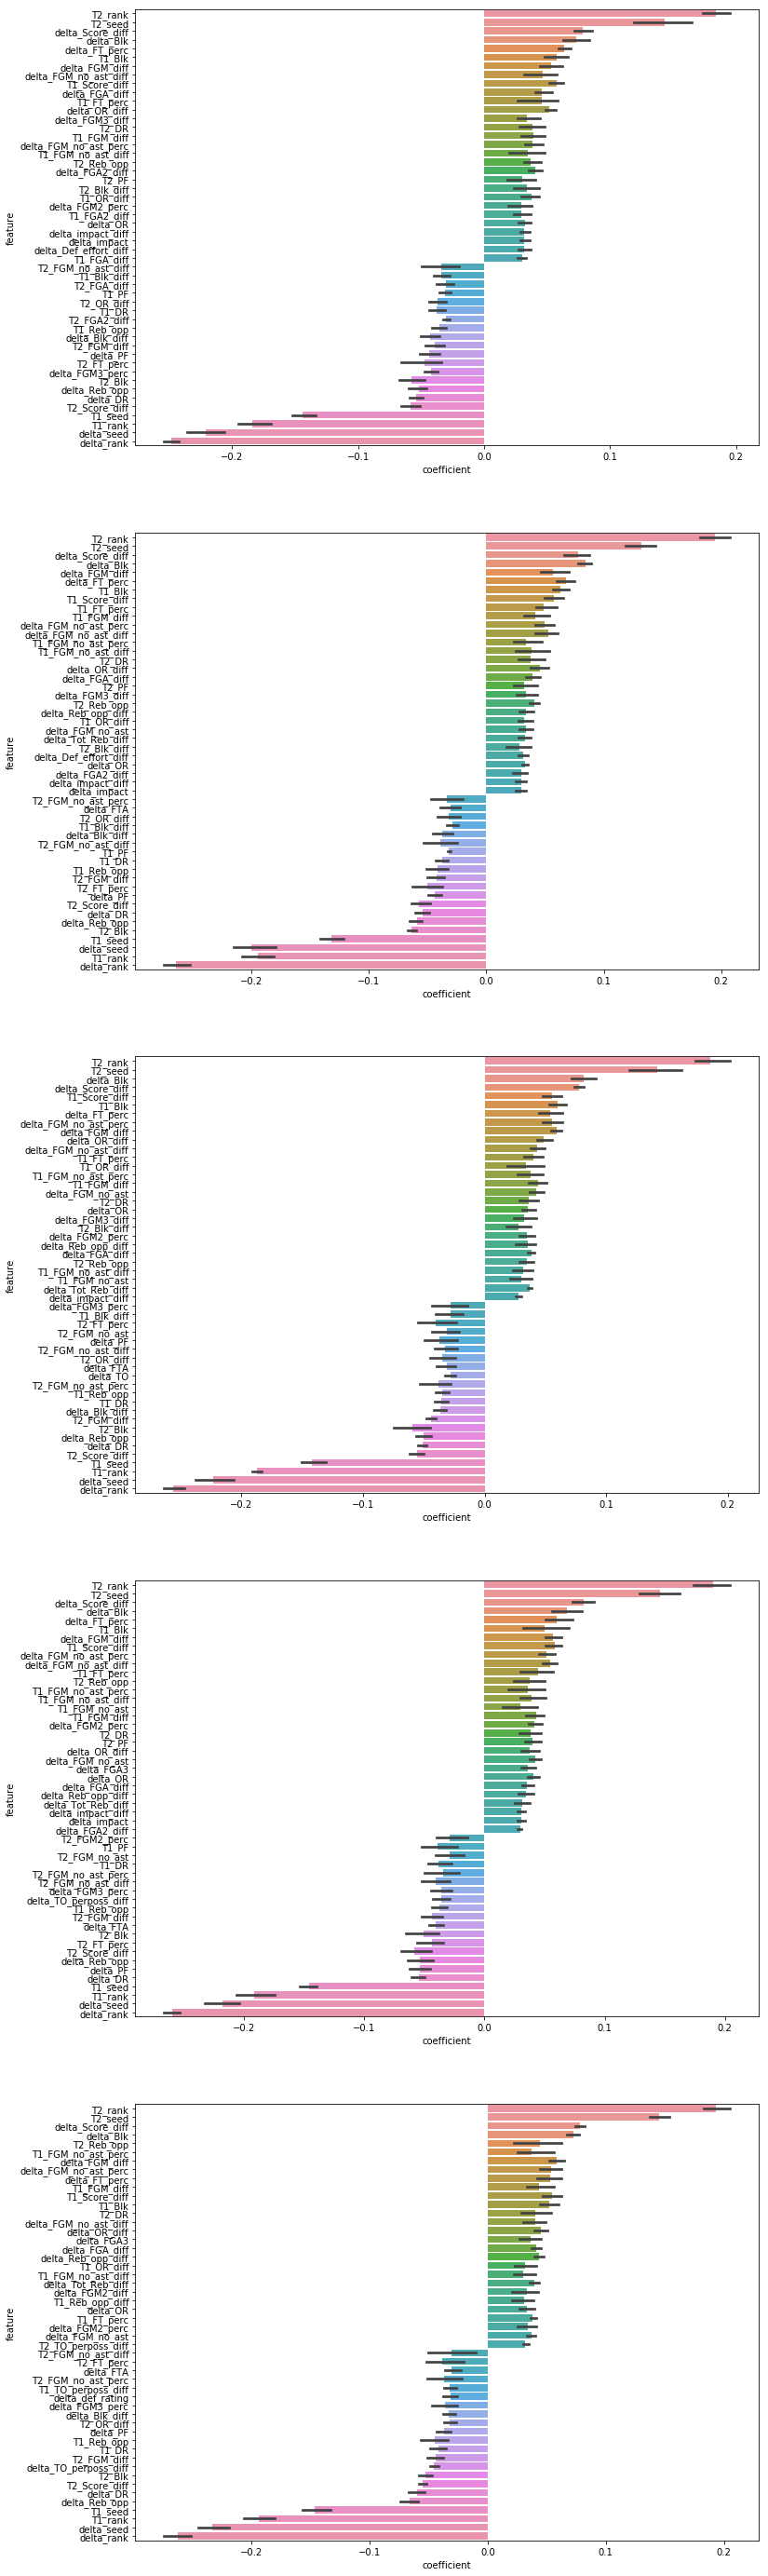

In [8]:
test_by_year(df_test)

fold n°0
fold n°1
fold n°2
fold n°3
fold n°4
	 0.5494905217633836


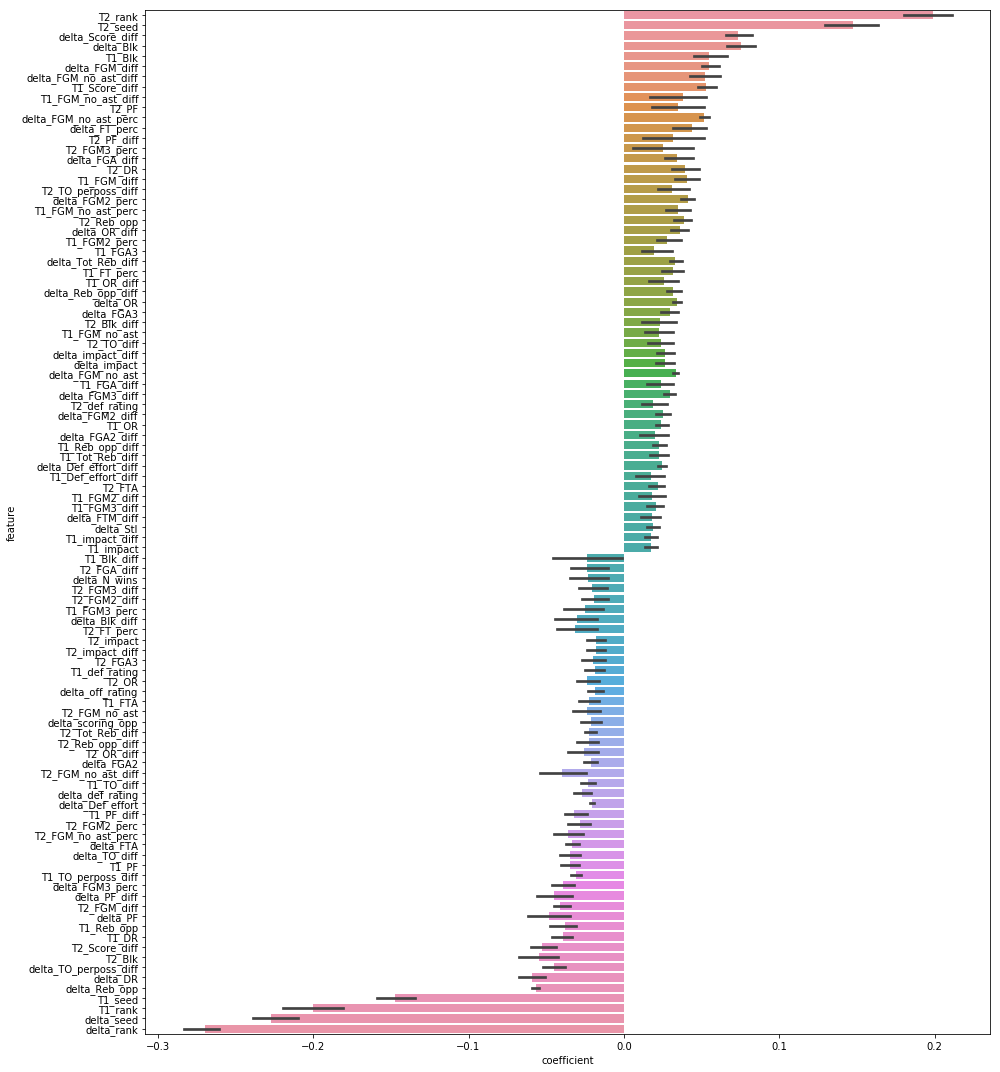

In [9]:
oof = test_all_year(df_test)

In [9]:
make_sub(df_test, oof, 'new_feats_all.csv')

# Interactions to help

In [6]:
adv_set = df_test.copy()
adv_set.head()

,Season,DayNum,Team1,Team2,target,target_points,T1_Loc,T2_Loc,ID,T1_Score,T1_FGM,T1_FGA,T1_FGM3,T1_FGA3,T1_FTM,T1_FTA,T1_OR,T1_DR,T1_Ast,T1_TO,T1_Stl,T1_Blk,T1_PF,T1_FGM2,T1_FGA2,T1_Tot_Reb,T1_FGM_no_ast,T1_possessions,T1_off_rating,T1_scoring_opp,T1_TO_perposs,T1_def_rating,T1_impact,T1_Def_effort,T1_Reb_opp,T1_Score_diff,T1_FGM_diff,T1_FGA_diff,T1_FGM3_diff,T1_FGA3_diff,T1_FTM_diff,T1_FTA_diff,T1_OR_diff,T1_DR_diff,T1_Ast_diff,T1_TO_diff,T1_Stl_diff,T1_Blk_diff,T1_PF_diff,T1_FGM2_diff,T1_FGA2_diff,T1_Tot_Reb_diff,T1_FGM_no_ast_diff,T1_Def_effort_diff,T1_Reb_opp_diff,T1_possessions_diff,T1_off_rating_diff,T1_def_rating_diff,T1_scoring_opp_diff,T1_TO_perposs_diff,T1_impact_diff,T1_N_wins,T1_FGM_perc,T1_FGM2_perc,T1_FGM3_perc,T1_FT_perc,T1_FGM_no_ast_perc,T2_Score,T2_FGM,T2_FGA,T2_FGM3,T2_FGA3,T2_FTM,T2_FTA,T2_OR,T2_DR,T2_Ast,T2_TO,T2_Stl,T2_Blk,T2_PF,T2_FGM2,T2_FGA2,T2_Tot_Reb,T2_FGM_no_ast,T2_possessions,T2_off_rating,T2_scoring_opp,T2_TO_perposs,T2_def_rating,T2_impact,T2_Def_effort,T2_Reb_opp,T2_Score_diff,T2_FGM_diff,T2_FGA_diff,T2_FGM3_diff,T2_FGA3_diff,T2_FTM_diff,T2_FTA_diff,T2_OR_diff,T2_DR_diff,T2_Ast_diff,T2_TO_diff,T2_Stl_diff,T2_Blk_diff,T2_PF_diff,T2_FGM2_diff,T2_FGA2_diff,T2_Tot_Reb_diff,T2_FGM_no_ast_diff,T2_Def_effort_diff,T2_Reb_opp_diff,T2_possessions_diff,T2_off_rating_diff,T2_def_rating_diff,T2_scoring_opp_diff,T2_TO_perposs_diff,T2_impact_diff,T2_N_wins,T2_FGM_perc,T2_FGM2_perc,T2_FGM3_perc,T2_FT_perc,T2_FGM_no_ast_perc,stage_16,stage_32,stage_4,stage_64,stage_8,stage_Final,T1_rank,T2_rank,T1_seed,T2_seed,delta_Loc,delta_Score,delta_FGM,delta_FGA,delta_FGM3,delta_FGA3,delta_FTM,delta_FTA,delta_OR,delta_DR,delta_Ast,delta_TO,delta_Stl,delta_Blk,delta_PF,delta_FGM2,delta_FGA2,delta_Tot_Reb,delta_FGM_no_ast,delta_possessions,delta_off_rating,delta_scoring_opp,delta_TO_perposs,delta_def_rating,delta_impact,delta_Def_effort,delta_Reb_opp,delta_Score_diff,delta_FGM_diff,delta_FGA_diff,delta_FGM3_diff,delta_FGA3_diff,delta_FTM_diff,delta_FTA_diff,delta_OR_diff,delta_DR_diff,delta_Ast_diff,delta_TO_diff,delta_Stl_diff,delta_Blk_diff,delta_PF_diff,delta_FGM2_diff,delta_FGA2_diff,delta_Tot_Reb_diff,delta_FGM_no_ast_diff,delta_Def_effort_diff,delta_Reb_opp_diff,delta_possessions_diff,delta_off_rating_diff,delta_def_rating_diff,delta_scoring_opp_diff,delta_TO_perposs_diff,delta_impact_diff,delta_N_wins,delta_FGM_perc,delta_FGM2_perc,delta_FGM3_perc,delta_FT_perc,delta_FGM_no_ast_perc,delta_rank,delta_seed
0,2003,134,1411,1421,0,-8,0,0,2003_1411_1421,72.800000,24.733333,55.266667,5.933333,18.500000,17.400000,28.066667,13.166667,24.800000,14.200000,15.233333,6.433333,2.233333,18.300000,18.800000,36.766667,37.966667,10.533333,44.001667,173.193342,1.634307,0.361196,134.807976,0.532616,89.351498,0.724640,1.966667,-0.933333,-5.133333,-1.600000,-4.666667,5.433333,9.333333,1.233333,1.933333,0.433333,0.900000,-1.566667,-0.366667,-3.333333,0.666667,-0.466667,3.166667,-1.366667,-1.606612,-0.033819,-9.900000,38.385366,-38.385366,0.321635,0.091486,0.065232,0.600000,0.447527,0.511333,0.320721,0.619952,0.425876,71.206897,24.379310,56.793103,6.482759,18.000000,15.965517,20.931034,12.275862,23.172414,13.034483,16.206897,7.068966,3.000000,19.103448,17.896552,38.793103,35.448276,11.344828,50.781897,146.966608,1.366193,0.318689,163.179577,0.466801,84.903762,0.697730,-7.241379,-3.413793,-4.172414,-1.137931,-2.758621,0.724138,-1.620690,-1.448276,0.344828,-2.827586,3.379310,-1.758621,-1.241379,0.413793,-2.275862,-1.413793,-1.103448,-0.586207,4.445492,-0.012650,1.425000,-16.212970,16.212970,-0.132237,0.054515,-0.066398,0.448276,0.429265,0.461333,0.360153,0.762768,0.465347,0,0,0,0,0,0,239.281250,240.343750,16,16,0,1.593103,0.354023,-1.526437,-0.549425,0.500000,1.434483,7.135632,0.890805,1.627586,1.165517,-0.973563,-0.635632,-0.766667,-0.803448,0.903448,-2.026437,2.518391,-0.811494,-6.780230,26.226735,0.268114,0.042507,-28.371601,0.065815,4.447735,0.026911,9.208046,2.480460,-0.960920,-0.462069,-1.908046,4.709195,10.954023,2.681609,1.588506,3.2

In [7]:
# .54782
diffs = [col for col in adv_set.columns if '_diff' in col]
to_drop = [col for col in diffs if 'FGM' in col]
to_drop += [col for col in diffs if 'FTM' in col]
to_drop += [col for col in diffs if 'Ast' in col]
to_drop += [col for col in diffs if 'PF' in col]
to_drop += [col for col in diffs if 'OR' in col or 'DR' in col]
to_drop += [col for col in diffs if 'rating' in col]  # .54562
to_drop += [col for col in diffs if 'Blk' in col]
to_drop += [col for col in diffs if 'impact' in col] # .54603

to_drop += [col for col in adv_set.columns if 'stage' in col]

to_drop += [col for col in diffs if 'FTA' in col]
to_drop += [col for col in adv_set.columns if 'FGM_perc' in col]
to_drop += [col for col in adv_set.columns if 'Def_effort' in col]
to_drop += [col for col in adv_set.columns if 'off_rating' in col]
to_drop += [col for col in adv_set.columns if 'possessions' in col]
to_drop += [col for col in adv_set.columns if 'scoring_opp' in col]
to_drop += [col for col in adv_set.columns if 'N_wins' in col]
to_drop += [col for col in adv_set.columns if 'Stl' in col] # 0.54503

to_drop += [col for col in diffs if 'FGA2' in col] #  0.54407

to_drop += [col for col in diffs if 'FGA3' in col]
to_drop += [col for col in adv_set.columns if '2_TO' in col or '1_TO' in col] #  0.54224


for col in to_drop:
    try:
        del adv_set[col]
    except KeyError:
        pass

adv_set['T1_Ast_noast'] = adv_set['T1_Ast'] * adv_set['T1_FGM_no_ast']
adv_set['T1_Ast_noastperc'] = adv_set['T1_Ast'] * adv_set['T1_FGM_no_ast_perc']
adv_set['T2_Ast_noast'] = adv_set['T2_Ast'] * adv_set['T2_FGM_no_ast']
adv_set['T2_Ast_noastperc'] = adv_set['T2_Ast'] * adv_set['T2_FGM_no_ast_perc']
adv_set['delta_Ast_noast'] = adv_set['T1_Ast_noast'] - adv_set['T2_Ast_noast']
adv_set['delta_Ast_noastperc'] = adv_set['T1_Ast_noastperc'] - adv_set['T2_Ast_noastperc']  # 0.54175


to_drop = ['T1_FGA3', 'T2_FGA3', 'T1_FGM2', 'T2_FGM2', 'delta_FGM2', 'delta_FGA3'] # 0.54157
to_drop += ['T1_FGM3', 'T2_FGM3', 'delta_FGM3']  # 0.54131
to_drop += [col for col in adv_set.columns if 'delta_TO' in col]
to_drop += ['T1_Score', 'T2_Score', 'T1_FTM', 'T2_FTM', 'T1_Tot_Reb', 'T2_Tot_Reb',
           'T1_FGA', 'T2_FGA', 'T1_FGA2', 'T2_FGA2', 'T1_FGM', 'T2_FGM', 'T1_Ast', 'T2_Ast']
for col in to_drop:
    try:
        del adv_set[col]
    except KeyError:
        pass

In [8]:
to_add = ['Season', 'target']


fold n°0
{'logit__C': 0.01}
0.545
fold n°1
{'logit__C': 0.02}
0.541
fold n°2
{'logit__C': 0.01}
0.55
fold n°3
{'logit__C': 0.01}
0.546
fold n°4
{'logit__C': 0.01}
0.533
	 0.5423320545356972


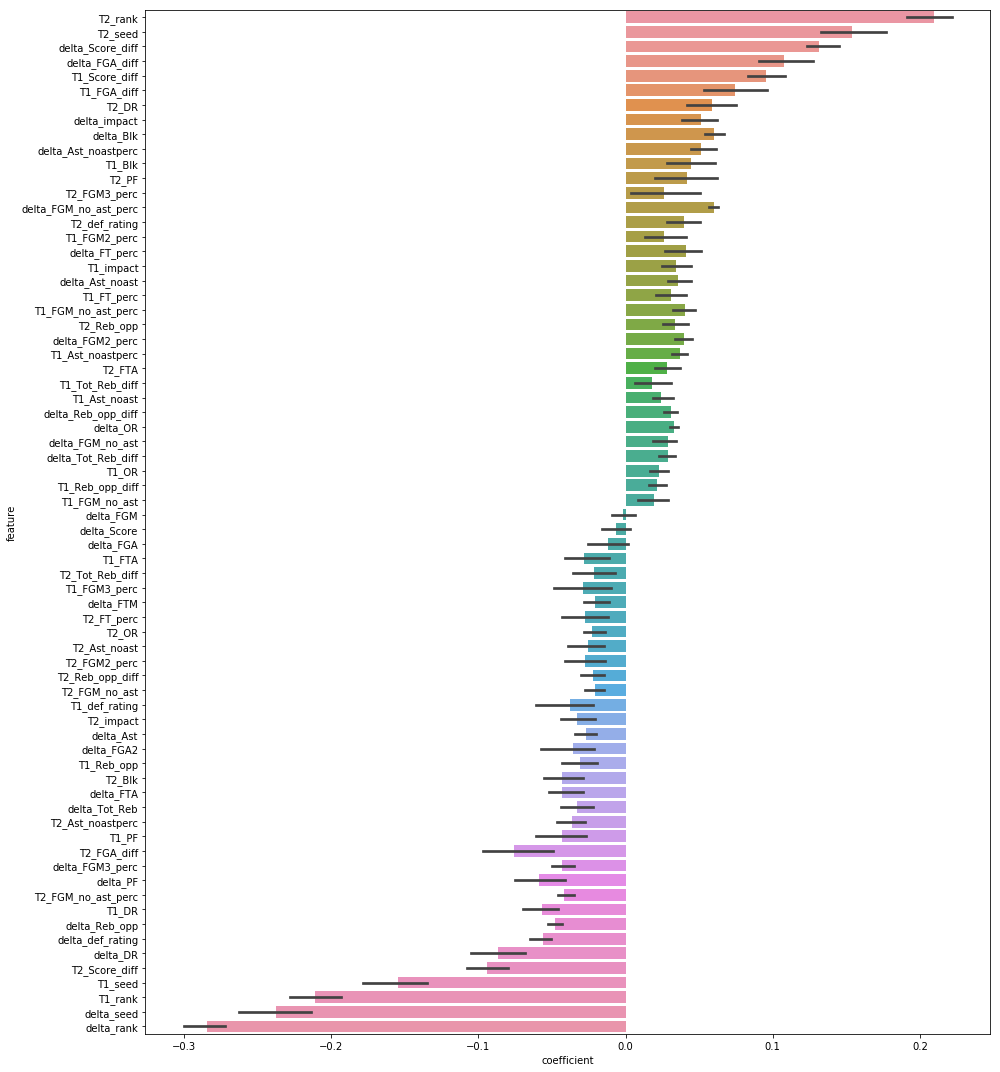

In [9]:
oof = test_all_year(adv_set)

In [10]:
make_sub(adv_set, oof, 'logit_first_drops')

df_test['prediction'] = oof

df_test.to_csv('model_results/men/predictions.csv', index=False)

2014
fold n°0
{'logit__C': 0.01}
0.542
fold n°1
{'logit__C': 0.01}
0.551
fold n°2
{'logit__C': 0.01}
0.553
fold n°3
{'logit__C': 0.02}
0.54
fold n°4
{'logit__C': 0.02}
0.536
	 0.5416708101557218
	 0.5608700078713111
2015
fold n°0
{'logit__C': 0.01}
0.554
fold n°1
{'logit__C': 0.01}
0.543
fold n°2
{'logit__C': 0.01}
0.557
fold n°3
{'logit__C': 0.01}
0.539
fold n°4
{'logit__C': 0.02}
0.533
	 0.5432062588051896
	 0.5171762682267165
2016
fold n°0
{'logit__C': 0.01}
0.551
fold n°1
{'logit__C': 0.02}
0.537
fold n°2
{'logit__C': 0.02}
0.541
fold n°3
{'logit__C': 0.01}
0.545
fold n°4
{'logit__C': 0.01}
0.534
	 0.5399339419602086
	 0.5562746914885035
2017
fold n°0
{'logit__C': 0.01}
0.548
fold n°1
{'logit__C': 0.01}
0.541
fold n°2
{'logit__C': 0.01}
0.544
fold n°3
{'logit__C': 0.02}
0.539
fold n°4
{'logit__C': 0.02}
0.534
	 0.5434368780513713
	 0.5280232060999963
2018
fold n°0
{'logit__C': 0.01}
0.541
fold n°1
{'logit__C': 0.01}
0.547
fold n°2
{'logit__C': 0.02}
0.547
fold n°3
{'logit__C': 0.02

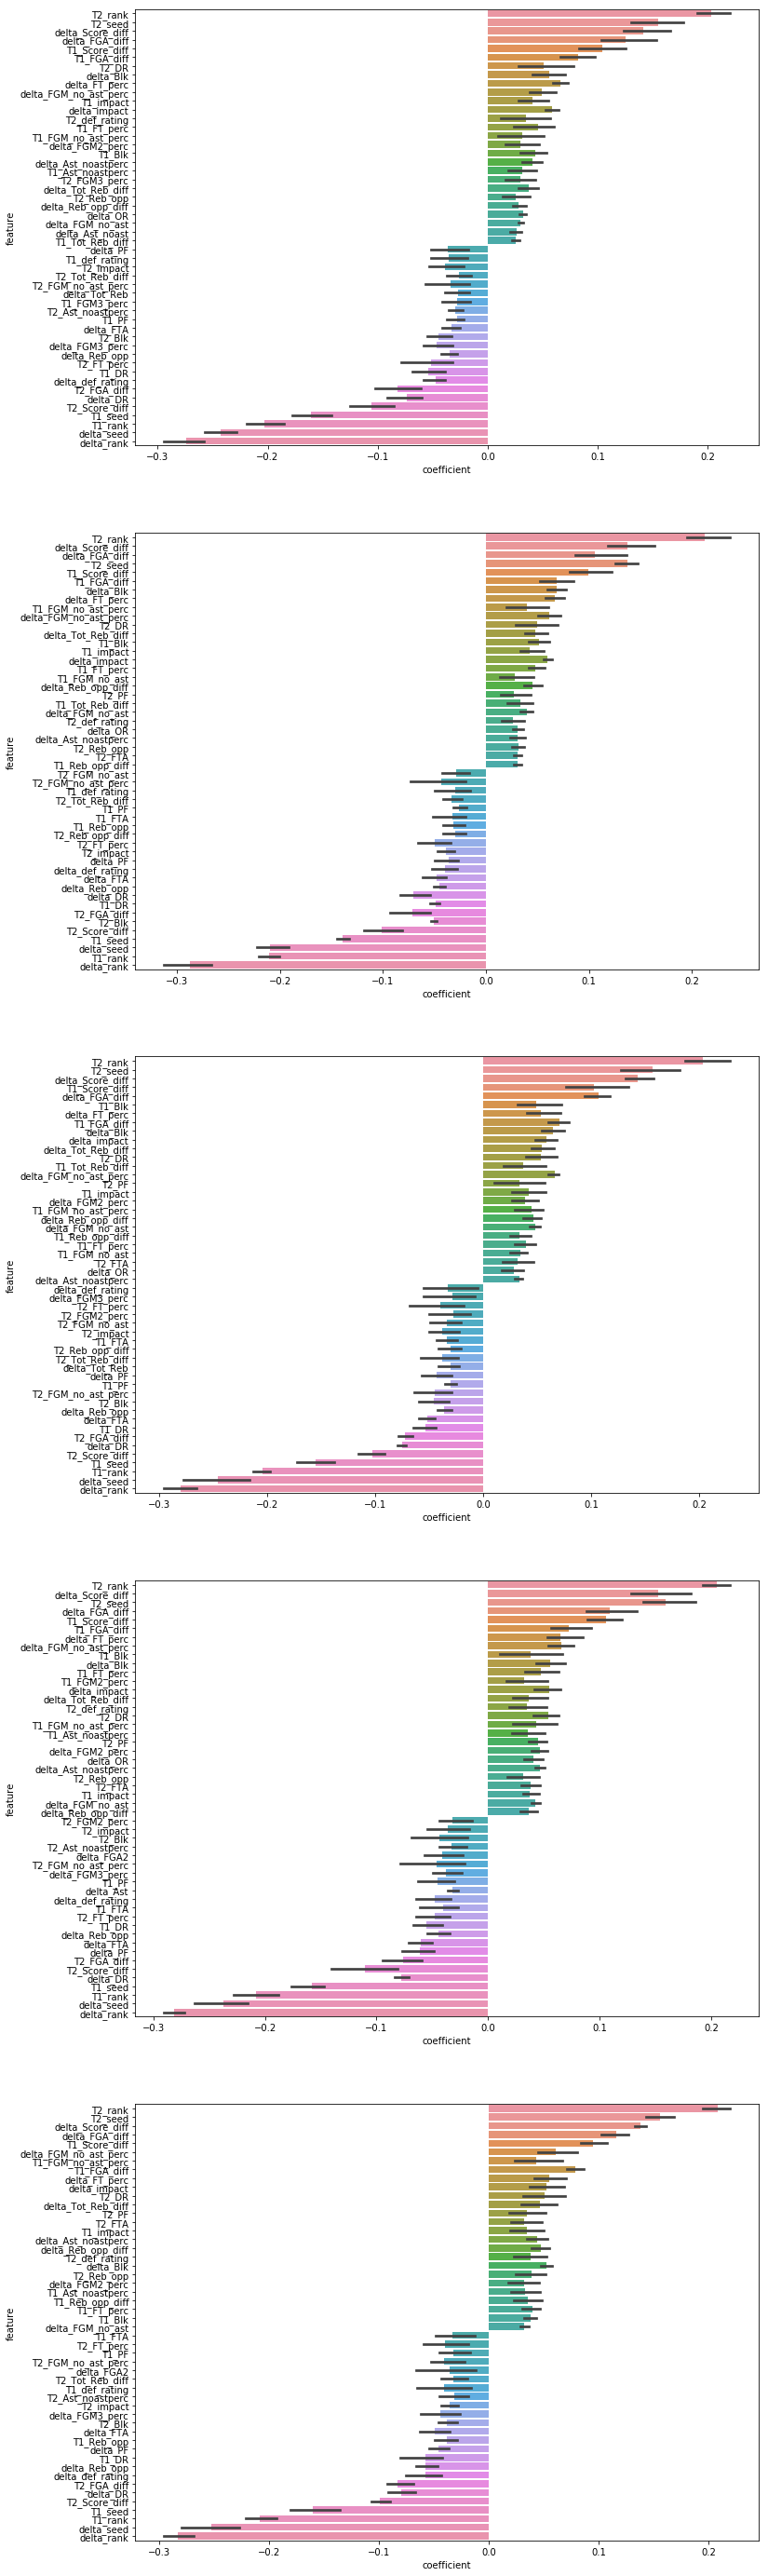

In [11]:
test_by_year(adv_set)

# Forests

In [56]:
def test_by_year_et(df_test):
    coefs = {}

    for year in range(2014, 2019):
        print(year)
        
        train = df_test[df_test.Season < year].copy()
        test = df_test[df_test.Season == year].copy()

        target = train['target']
        validation = test['target']

        to_drop = ['target','target_points','Team1','Team2', 'ID', 'DayNum', 'Pred', 'Season']
        to_drop += [col for col in train.columns if 'Loc' in col]

        for col in to_drop:
            try:
                del train[col]
                del test[col]
            except KeyError:
                pass

        kfolds = KFold(5, shuffle=True, random_state=984)

        et = ExtraTreesClassifier(n_estimators=1000, n_jobs=-1, random_state=651, 
                                  max_depth=15, min_samples_leaf=30)

        comm_cols = list(set(train.columns).intersection(test.columns))

        oof = np.zeros(len(train))
        predictions = np.zeros(len(test))
        feature_importance_df = pd.DataFrame()

        for fold_, (trn_idx, val_idx) in enumerate(kfolds.split(train.values, target.values)):
            print("fold n°{}".format(fold_))

            trn_data = train.iloc[trn_idx][comm_cols]
            trn_target = target.iloc[trn_idx]

            val_data = train.iloc[val_idx][comm_cols]
            val_target = target.iloc[val_idx]
            
            grid_param = {
                'max_features': [None, 'sqrt', 'log2']}
            grid = GridSearchCV(et, param_grid=grid_param, n_jobs=-1, 
                            cv=5, scoring='neg_log_loss')
            grid.fit(trn_data, trn_target)
            best_pipe = grid.best_estimator_
            print(grid.best_params_)
            print(round( (-grid.best_score_ ) ,3))
            
            #best_et = Pipeline([scl, ('logit', LogisticRegression(solver='lbfgs', max_iter=5000, C=0.01))])

            model = et.fit(trn_data, trn_target)

            oof[val_idx] = model.predict_proba(val_data)[:,1]

            predictions += model.predict_proba(test[comm_cols])[:,1] / kfolds.n_splits

            fold_importance_df = pd.DataFrame()
            fold_importance_df["feature"] = comm_cols
            fold_importance_df["importance"] = model.feature_importances_
            fold_importance_df["fold"] = fold_ + 1
            feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

        coefs[year] = feature_importance_df
        
        print(f'\t {log_loss(target, oof)}')
        print(f'\t {log_loss(validation, predictions)}')
        
    fig, ax = plt.subplots(5, 1, figsize=(12, 50))

    i = 0

    for year in coefs.keys():
        cols = (coefs[year][["feature", "importance"]]
                .groupby("feature")
                .mean().abs()
                .sort_values(by="importance", ascending=False)[:50].index)

        best_features = coefs[year].loc[coefs[year].feature.isin(cols)]

        sns.barplot(x="importance",
                    y="feature",
                    data=best_features.sort_values(by="importance",
                                                   ascending=False), ax=ax[i])
        i += 1

In [57]:
test_by_year_et(adv_set)

2014
fold n°0
{'max_features': None}
0.533
fold n°1
{'max_features': None}
0.546
fold n°2
{'max_features': None}
0.55
fold n°3
{'max_features': None}
0.542
fold n°4
{'max_features': None}
0.539
	 0.5703502775075152
	 0.6108272431691361
2015
fold n°0
{'max_features': None}
0.555
fold n°1
{'max_features': None}
0.55
fold n°2
{'max_features': None}
0.557
fold n°3
{'max_features': None}
0.545
fold n°4
{'max_features': None}
0.541
	 0.5727501532586072
	 0.5466270690658732
2016
fold n°0
{'max_features': None}
0.556
fold n°1
{'max_features': None}
0.544
fold n°2
{'max_features': None}
0.551
fold n°3
{'max_features': None}
0.556
fold n°4
{'max_features': None}
0.544
	 0.5693298505419548
	 0.5965804648534635
2017
fold n°0
{'max_features': None}
0.56
fold n°1
{'max_features': None}
0.556
fold n°2
{'max_features': None}
0.555
fold n°3
{'max_features': None}
0.551
fold n°4
{'max_features': None}
0.545
	 0.5696705214962343
	 0.5493100727497571
2018
fold n°0
{'max_features': None}
0.549
fold n°1


KeyboardInterrupt: 

# Old things that helped a bit

In [ ]:
# 0.5389642789248124
del adv_set['delta_OR_diff']
del adv_set['delta_TO_diff']
del adv_set['delta_Stl_diff']
del adv_set['delta_PF_diff'] #0.5391002141564809
del adv_set['delta_TO_alone_diff']
del adv_set['delta_DR_diff'] #0.5377636423072842
del adv_set['delta_FGA_diff']
del adv_set['delta_TO_alone'] #0.5366627323855082
del adv_set['delta_FTA_diff']
del adv_set['delta_FGA2_diff']
del adv_set['delta_Tot_Reb_diff']
del adv_set['delta_FGM2_diff'] # 0.5358568694290883

del adv_set['delta_Reb_frac'] # 0.5358028350048105

In [44]:
train = df_test[df_test.Season < 2020].copy()

test = df_test[df_test.Season == 2014].copy()

target = train['target']
validation = test['target']

to_drop = ['target','target_points','Team1','Team2', 'ID', 'DayNum', 'Pred']

for col in to_drop:
    try:
        del train[col]
        del test[col]
    except KeyError:
        pass
    
kfolds = KFold(5, shuffle=True, random_state=984)

scl = ('scl', RobustScaler())

In [ ]:
    comm_cols = [col for col in comm_cols if col != 'delta_PF']
    comm_cols = [col for col in comm_cols if col != 'delta_PF_diff']
    comm_cols = [col for col in comm_cols if col != 'delta_TO']
    comm_cols = [col for col in comm_cols if col != 'delta_TO_diff']
    comm_cols = [col for col in comm_cols if col != 'delta_Stl']
    comm_cols = [col for col in comm_cols if col != 'delta_Stl_diff']
    comm_cols = [col for col in comm_cols if 'FTA' not in col]
    comm_cols = [col for col in comm_cols if 'FTM' not in col]

In [22]:
pipe = Pipeline([scl, ('logit', LogisticRegression(solver='lbfgs', max_iter=5000))])

for stat in stats:
    comm_cols = [col for col in train.columns if 'delta_' in col] # 0.5407
    comm_cols = [col for col in comm_cols if col != 'delta_Stl_diff'] # 0.5397
    comm_cols = [col for col in comm_cols if col != 'PF'] # 0.5381
    comm_cols = [col for col in comm_cols if col != 'PF_diff'] # 0.5376
    comm_cols = [col for col in comm_cols if stat not in col]
    
    comm_cols = list(set(comm_cols))

    oof = np.zeros(len(train))

    for fold_, (trn_idx, val_idx) in enumerate(kfolds.split(train.values, target.values)):
        #print("fold n°{}".format(fold_))

        trn_data = train.iloc[trn_idx][comm_cols]
        trn_target = target.iloc[trn_idx]

        val_data = train.iloc[val_idx][comm_cols]
        val_target = target.iloc[val_idx]

        model = pipe.fit(trn_data, trn_target)

        oof[val_idx] = model.predict_proba(val_data)[:,1]

    if log_loss(target, oof) < 0.5376:
        print(stat)
        print('\t' + str(log_loss(target, oof)))

In [166]:


kfolds = KFold(5, shuffle=True, random_state=984)

comm_cols = [col for col in train.columns if 'delta_' in col] # 0.5407
#comm_cols = [col for col in comm_cols if col != 'delta_Stl_diff'] # 0.5397
#comm_cols = [col for col in comm_cols if col != 'PF'] # 0.5381
#comm_cols = [col for col in comm_cols if col != 'PF_diff']
#comm_cols = [col for col in comm_cols if col != 'delta_PF']
#comm_cols = [col for col in comm_cols if col != 'delta_PF_diff']
#comm_cols = [col for col in comm_cols if col != 'delta_TO']
#comm_cols = [col for col in comm_cols if col != 'delta_TO_diff']
#comm_cols = [col for col in comm_cols if col != 'delta_Stl']
#comm_cols = [col for col in comm_cols if col != 'delta_Stl_diff']
#comm_cols = [col for col in comm_cols if 'FTA' not in col]
#comm_cols = [col for col in comm_cols if 'FTM' not in col]

comm_cols = list(set(train.columns))#.intersection(test.columns))

oof = np.zeros(len(train))
#predictions = np.zeros(len(test))

for fold_, (trn_idx, val_idx) in enumerate(kfolds.split(train.values, target.values)):
    #print("fold n°{}".format(fold_))

    trn_data = train.iloc[trn_idx][comm_cols]
    trn_target = target.iloc[trn_idx]

    val_data = train.iloc[val_idx][comm_cols]
    val_target = target.iloc[val_idx]

    model = pipe.fit(trn_data, trn_target)

    oof[val_idx] = model.predict_proba(val_data)[:,1]
    
    #predictions += model.predict_proba(test[comm_cols])[:,1] / kfolds.n_splits
    
print(log_loss(target, oof))
#print(log_loss(validation, predictions))

0.5646937136747286


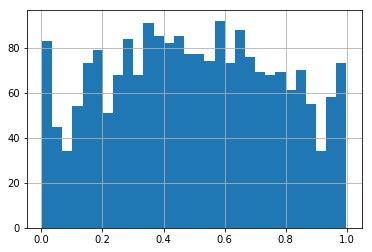

In [24]:
pd.Series(oof).hist(bins=30)

In [25]:
df_test['Pred'] = oof

sub = pd.read_csv('raw_data/mens-machine-learning-competition-2019/SampleSubmissionStage1.csv')

del sub['Pred']

sub = pd.merge(sub, df_test[['ID', 'Pred']], on='ID', how='left').fillna(0.5)

sub.head()

,ID,Pred
0,2014_1107_1110,0.5
1,2014_1107_1112,0.5
2,2014_1107_1113,0.5
3,2014_1107_1124,0.5
4,2014_1107_1140,0.5


In [26]:
sub.to_csv('SampleLogit_delta.csv', index=False)

In [48]:
grid_param = {'max_depth': np.arange(3,30),
                'min_samples_split': np.arange(2, 50), 
               'min_samples_leaf': np.arange(1,40), 
                'max_features': ['sqrt', 'log2', None]}

grid = RandomizedSearchCV(RandomForestClassifier(n_estimators=300, n_jobs=4, random_state=345),
                        param_distributions=grid_param, n_iter=20, cv=kfolds, 
                        random_state=654, n_jobs=-1, scoring='neg_log_loss')

grid.fit(train[[col for col in train.columns if 'delta_' in col]], target)

best_forest = grid.best_estimator_

print(grid.best_params_)
print(round( (-grid.best_score_ ) ,3))

{'min_samples_split': 27, 'min_samples_leaf': 31, 'max_features': None, 'max_depth': 17}
0.554
